In [1]:
# necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# reading in the data
df = pd.read_csv('knn_data.csv')
df.head() # print the first 5 rows of the dataframe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# print the dimensions of the dataframe
df.shape

(768, 9)

In [5]:
# creating the numpy arrays for features and target
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

In [6]:
# split the data into training and testing sets
X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

In [16]:
# creating the models and testing with different k values

# setup the arrays to store the training and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
  # setup a knn classifier with k neighbors
  knn = KNeighborsClassifier(n_neighbors=k)

  # fit the model
  knn.fit(X_train, y_train)

  # compute the accuracy on the training set
  train_accuracy[i] = knn.score(X_train, y_train)

  # compute the accuracy on the test set
  test_accuracy[i] = knn.score(X_test, y_test)

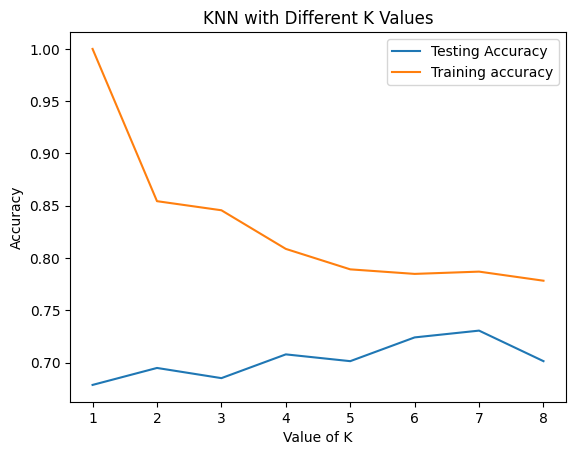

In [8]:
# Generate a plot of the training and testing accuracy with k neighbors
plt.title('KNN with Different K Values')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.show()

In [9]:
# make a new model with k set to 7
knn = KNeighborsClassifier(n_neighbors=7)

# fit the model
knn.fit(X_train, y_train)

# get the accuracy
knn.score(X_test, y_test)

0.7305194805194806

In [10]:
# make a prediction using new data
knn.predict([[2, 154, 71, 32, 0, 27.8, 0.677, 33]])

array([1])

# YOUR TURN!

In [12]:
df = pd.read_csv('star_classification.csv')

# dropping unnecessary features, this code is provided
df.drop(['obj_ID','run_ID','rerun_ID','field_ID','fiber_ID'], axis=1, inplace=True)

df.head()

,alpha,delta,u,g,r,i,z,cam_col,spec_obj_ID,class,redshift,plate,MJD
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,2,6.543777e+18,GALAXY,0.634794,5812,56354
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,5,1.176014e+19,GALAXY,0.779136,10445,58158
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,2,5.152200e+18,GALAXY,0.644195,4576,55592
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,3,1.030107e+19,GALAXY,0.932346,9149,58039
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,3,6.891865e+18,GALAXY,0.116123,6121,56187


In [13]:
# change the words to numbers in the target, fill in the target
df['class'] = pd.factorize(df['class'])[0]

In [14]:
df.shape

(100000, 13)

In [15]:
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)


In [17]:
# setup the arrays to store the training and test accuracies
neighbors = np.arange(1, 20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
  # setup a knn classifier with k neighbors
  knn = KNeighborsClassifier(n_neighbors=k)

  # fit the model
  knn.fit(X_train, y_train)

  # compute the accuracy on the training set
  train_accuracy[i] = knn.score(X_train, y_train)

  # compute the accuracy on the test set
  test_accuracy[i] = knn.score(X_test, y_test)

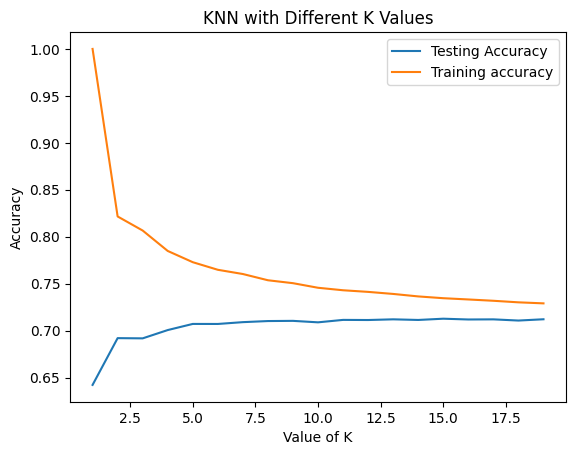

In [18]:
# Generate a plot of the training and testing accuracy with k neighbors
plt.title('KNN with Different K Values')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.show()

In [22]:
print(test_accuracy)

[0.6421     0.69193333 0.6917     0.70053333 0.70706667 0.70703333
 0.70896667 0.71013333 0.71033333 0.70876667 0.71136667 0.71123333
 0.71196667 0.7113     0.71263333 0.7118     0.71193333 0.71066667
 0.71203333]
